In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

In [3]:
# PTT 八掛版網址
URL = 'https://www.ptt.cc/bbs/Gossiping/index.html'

In [4]:
# 設定COOKIES
cook = {'over18':'1'}
resp = requests.get(url= URL, cookies = cook)

In [12]:
# 爬取標題以及連結
content = []
link = []
article = []

soup = BeautifulSoup(markup=resp.text, features='html.parser')
nodes = soup.select(selector = 'div.title a')
for i in nodes:
    content.append(i.text)
    link.append('https://www.ptt.cc' + i.get('href'))

In [14]:
# 爬取內文
for i in link:
    cook = {'over18':'1'}
    resp = requests.get(url=i, cookies = cook)
    soup = BeautifulSoup(markup=resp.text, features='html.parser')
    nodes = soup.select(selector = '#main-content')
    text = ''
    for j in nodes:
        text += j.text
    article.append(text)

In [18]:
# 存成Dataframe格式
df = pd.DataFrame(zip(content, link, article), columns=['Content', 'Link', 'Article'])

In [19]:
df.head()

,Content,Link,Article
0,Re: [爆卦] 賽諾菲和葛蘭素失敗的疫苗1/2期實驗,https://www.ptt.cc/bbs/Gossiping/M.1622449419....,作者going70 (心靜止水)看板Gossiping標題Re: [爆卦] 賽諾菲和葛蘭素失...
1,[問卦] 雨這樣下中部人爽了沒,https://www.ptt.cc/bbs/Gossiping/M.1622449420....,作者kimura0701 (一天要喝3千cc的水)看板Gossiping標題[問卦] 雨這樣...
2,[問卦] 政府挺到底。生科是不是要翻身了？,https://www.ptt.cc/bbs/Gossiping/M.1622449504....,作者kauosong (如何一少年，匆匆已白頭)看板Gossiping標題[問卦] 政府挺到...
3,[問卦] 現在的假消息?,https://www.ptt.cc/bbs/Gossiping/M.1622449533....,作者sera520 (雷霆)看板Gossiping標題[問卦] 現在的假消息?時間Mon M...
4,Re: [爆卦] 輝瑞BNT二期試驗人數遠不止360人!,https://www.ptt.cc/bbs/Gossiping/M.1622449541....,作者LibertyBell (May it be.....)看板Gossiping標題Re:...


In [22]:
import jieba

In [32]:
# jieba分詞
seg = jieba.cut(article[1])
seg = jieba.cut(text,cut_all=True, HMM=True)
print('【全模式】{}'.format(' '.join(seg)))

【全模式】作者 kimura0701    ( 一天 要 喝 3 千 cc 的 水 ) 看板 Gossiping 標 題 [ 問 卦 ]    雨 這 樣 下 中部 人 爽 了 沒 時 間 Mon     May     31     16 : 23 : 36     2021  
  
  我 剛 剛 聽 廣 播     好像 雨 有 達 到 預 期  
  
  所以 限 水 時 間 不 會 再延 長  
  
  我 看 雷 達 回波     整 個 台 灣 上半 上半部 半部 幾 乎 都 紅 的  
  
  中部 也 有 涵 蓋 到  
  
  爽 了 沒     中部 人  
  
  16 ： 26 更新     突然 那 麼 多 人 推     好 害羞 // 
  - -  
 ※    發 信 站 :    批 踢踢 實 業 坊 ( ptt . cc ),    來 自 :    223 . 136 . 141 . 200    ( 臺 灣 ) 
 ※    文章 網 址 :    https :// www . ptt . cc / bbs / Gossiping / M . 1622449420 . A . D9B . html  
  推     leo76820 :    五 告送        36 . 233 . 22 . 219     05 / 31     16 : 24  
 →    trylin :    爽     不用 限 水 了 42 . 73 . 188 . 67     05 / 31     16 : 24  
 →    pinhanpaul :    終 於 有 水 可以 泡 麵 了           49 . 159 . 20 . 41     05 / 31     16 : 24  
  推     hikaru77613 :    紅 色 的 才 爽 … 下 吧 下 吧        110 . 30 . 89 . 138     05 / 31     16 : 24  
  推     ynhs123456 :    這 個 雨 跟 疫苗 差不多 不多 ， 都 姍 姍 來 遲           1 . 170 . 187 . 42     05 / 31     16 : 24  
  推

In [30]:
import jieba.analyse

In [36]:
# TF-IDF
text = article[1]
tag=list(jieba.analyse.extract_tags(text, topK=20, allowPOS=['n','ns','nr','na'], withWeight=True))
print(tag)

[('水庫', 0.6078695340457627), ('天氣', 0.30393476702288136), ('缺水', 0.2281378974615254), ('時間', 0.20262317801525423), ('終於', 0.20262317801525423), ('摸豆', 0.20262317801525423), ('限水', 0.20262317801525423), ('德基', 0.20262317801525423), ('集水', 0.16112251690338983), ('地方', 0.149691268960339), ('地下水', 0.12964023336966102), ('看板', 0.11780235298305085), ('整群', 0.1119282243338983), ('梅雨季', 0.10849207935), ('水吧', 0.1041630486398305), ('五毛', 0.1041630486398305), ('標題', 0.10131158900762711), ('問卦', 0.10131158900762711), ('雷達', 0.10131158900762711), ('台灣', 0.10131158900762711)]


In [39]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [57]:
# 停用字設定
stop_words = ['推','爽','噓','爽啦','https','ppn','爽啊']

(-0.5, 399.5, 199.5, -0.5)

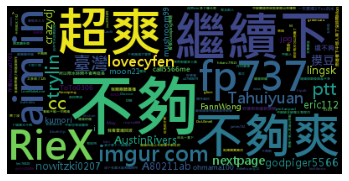

In [58]:
# 文字雲輸出
wc = WordCloud(background_color='black', font_path = 'C:/Windows/Fonts/msjhbd.ttc', stopwords=stop_words)
wc.generate(text)
plt.imshow(wc)
plt.axis("off")